In [438]:
# !pip install music21
import music21
import os
from music21 import *

us=music21.environment.UserSettings()
us.restoreDefaults()

#Setting environnement

#Morgan (Windows)
# music21.environment.set('musescoreDirectPNGPath',str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
# music21.environment.set('musicxmlPath', str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
# music21.environment.set('lilypondPath', r'C:\Users\jeffs\lilypond-2.24.2\bin\lilypond.exe')


# Thomas no legolas
music21.environment.set('lilypondPath', '/homelocal/thomas2/tools/lilypond-2.24.3/bin/lilypond')
# Thomas on choro
# lilypond_path = '/home/pellegri/tools/lilypond-2.24.3/bin/lilypond'


# XML_FOLDER = "CHORO_SONGBOOK_171/CHORO_XML"
XML_FOLDER = "CHORO_SONGBOOK_171/CHORO_XML_fixed"

In [439]:
def open_all_xml(folder, nb, filename=None):
    '''Retourne la liste des nb premiers objets music21.bases.scores
    du folder contenant des fichiers XML'''
    streams=[]
    if filename is None:
        for i,file in enumerate(os.listdir(folder)[:nb]) :
            s=music21.converter.parse(folder+"/"+file)
            streams.append(s)
            print(i+1, "fichiers XML charges"+20*" ",end='\r')
        print(100*" ")
    else:
        s=music21.converter.parse(folder+"/"+filename)
        streams.append(s)
        print("XML file loaded:", filename)

    print("Chargement termine")
    return streams


In [440]:
# streams = open_all_xml(XML_FOLDER, 20)
# print("Nb of streams:", len(streams))

streams = open_all_xml(XML_FOLDER, 1, "ACARICIANDO.xml")
print("Nb of streams:", len(streams))

XML file loaded: ACARICIANDO.xml
Chargement termine
Nb of streams: 1


# Piano roll and play midi

In [445]:
# Exemple d'utilisation :
# n = 13 # Vibracoes
n=0
score = streams[n]
    # score.show('text')
print(n, score.metadata.title)
print(type(score))

# streams[n].plot('histogram', 'pitchClass', 'count')
# streams[n].show('text')

0 ACARICIANDO
<class 'music21.stream.base.Score'>


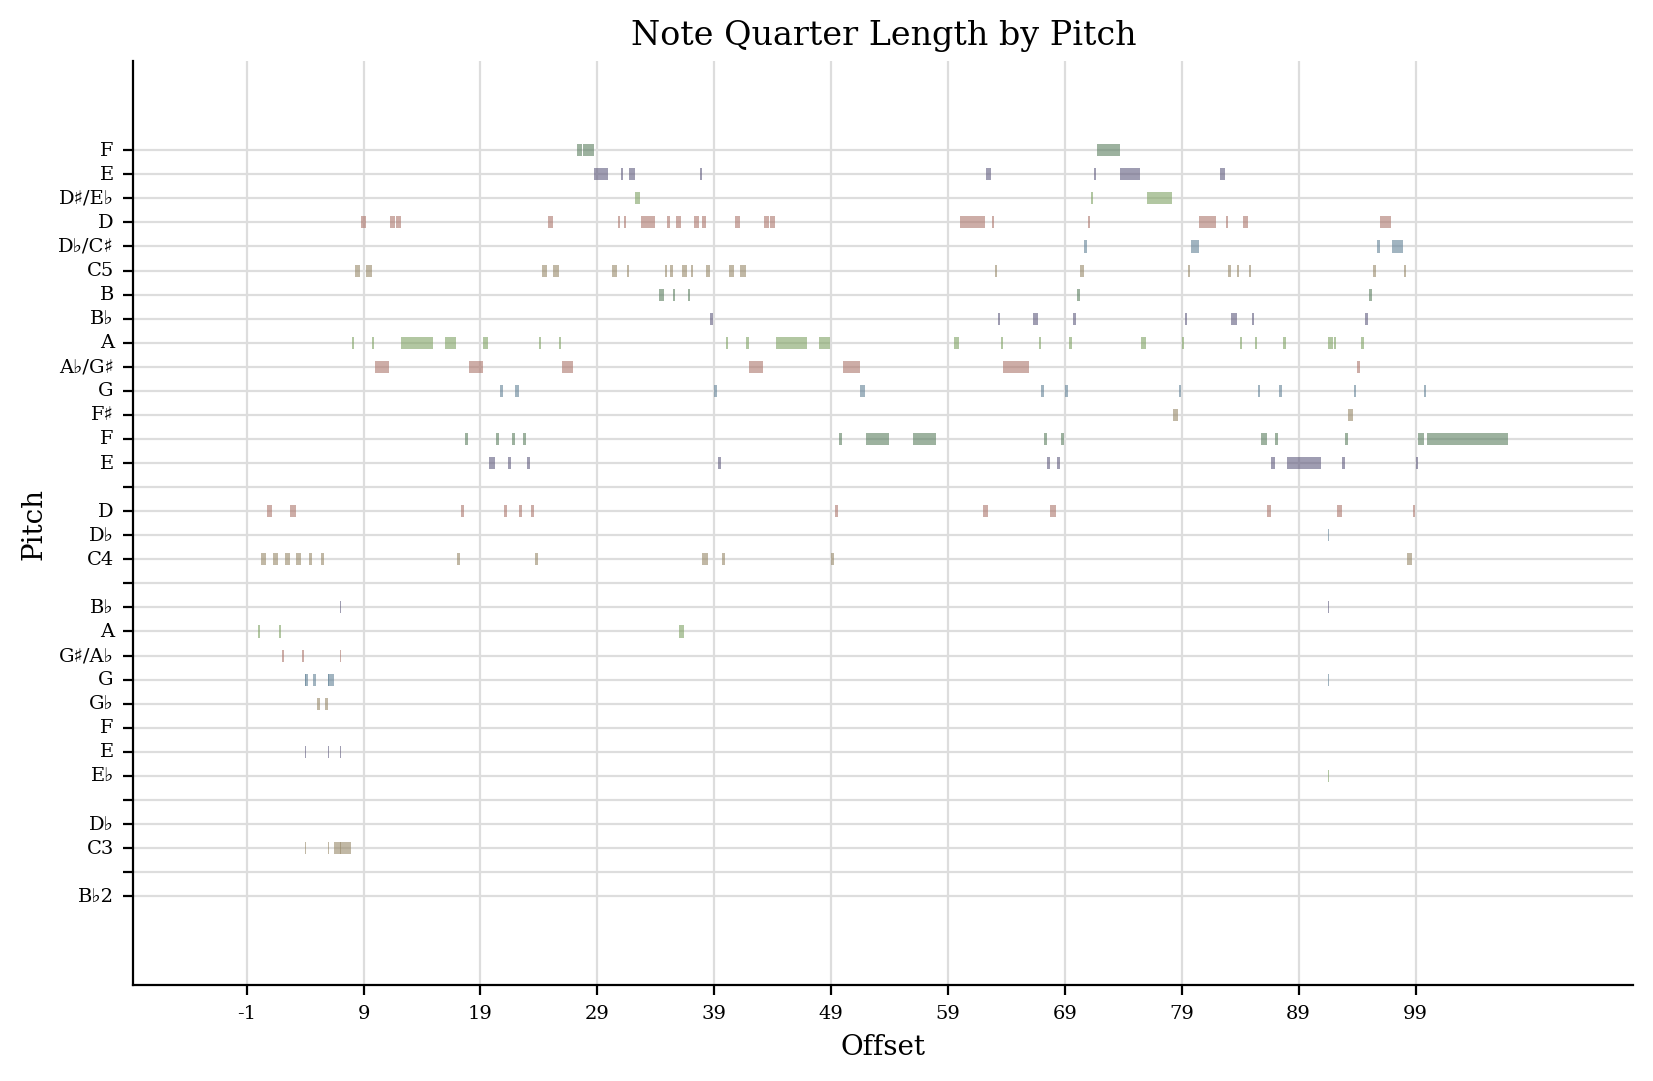

In [446]:
score.flatten().plot('pianoroll')

In [294]:
score.show('midi')

# Extract general info: Key, #Measures, Time signature, Rehearsal marks

In [295]:
def get_time_signature(score):
    '''Retourne la signature du temps de la partition en str sinon une str vide'''
    time_signature = None
    for element in score.flatten():
        if isinstance(element, meter.TimeSignature):
            time_signature = element
            break
    if time_signature:
        time_signature_name = time_signature.ratioString
        return time_signature_name
    else:
        return ''
    
def get_keys(score):
    '''Retourne la liste des clés de la partition'''
    keys=[]
    for element in score.flatten():
        if isinstance(element, key.KeySignature):
            keys.append(element)
    return keys



def get_number_of_measures(score):
    '''Retourne le nombre de mesure de la partition'''
    last_measure = None
    for element in score.recurse():
        if isinstance(element, stream.Measure):
            last_measure = element

    if last_measure:
        return last_measure.number
    else:
        return 0  # Aucune mesure trouvée
    
def get_measure_indices_for_parts(score):
    '''Retourne les numeros de mesures pour lequels la partition possede des RehearsalMark'''
    rehearsal_marks = score.recurse().getElementsByClass('RehearsalMark')
    measure_indices = []
    for mark in rehearsal_marks:
        mark_text = mark.content
        measure = mark.getContextByClass('Measure')
        if measure:
            measure_index = measure.number
            measure_indices.append((mark_text, measure_index))
    
    return measure_indices

def get_marks_repeat(score):
    '''retourne les indices des differente marques de repetition'''
    dic=dict()
    segno_mark=[]
    coda_mark=[]
    repeat_direct_left=[]
    repeat_direct_right=[]
    key_change=[]
    for part in score.parts:
        m = 0
        for measure in part.getElementsByClass(stream.Measure):
            for element in measure.flatten():
                if isinstance(element,music21.repeat.Segno):
                    segno_mark.append(measure.number)
                if isinstance(element,music21.repeat.Coda):
                    coda_mark.append(measure.number)
                if isinstance(element,music21.key.KeySignature):
                    key_change.append(measure.number)
                if isinstance(element, music21.bar.Repeat):
                    if element.direction=='start':
                        repeat_direct_left.append(measure.number)
                    else:
                        repeat_direct_right.append(measure.number)
    dic['Segno']=segno_mark
    dic['Coda']=coda_mark
    dic['Start']=repeat_direct_left
    dic['End']=repeat_direct_right
    dic['Key']=key_change
    
    return dic

def get_repeat(score):
    '''Retourne les numeros de mesures avec des RehearsalMark'''
    repeat_mark = score.recurse().getElementsByClass('RepeatBracket')
    repeat_dict=dict()
    
    r=0
    for mark in repeat_mark:
        measures=mark.getSpannedElements()
        if mark.number=='1':
            repeats=[]
            r+=1
            repeat_dict[r]=[]
        if len(measures)==1:
            repeat_dict[r]+=[( measures[0].number,measures[0].number)]
        else:
            repeat_dict[r]+=[( measures[0].number,measures[1].number)]
    return repeat_dict
 

In [296]:
# Exemple d'utilisation :
n = 0
score = streams[n]
# score.show('text')
print(score.metadata.title)

keys = get_keys(score)
t = get_time_signature(score)
nb_measures = get_number_of_measures(score)
print("Key Sig.:", keys)
analyzed_key = score.analyze('key')
print("Hyp. key:", analyzed_key, analyzed_key.correlationCoefficient)
for i in range(4):
    print(analyzed_key.alternateInterpretations[i], analyzed_key.alternateInterpretations[i].correlationCoefficient)


print("Time Sig.:", t)
print("Nb Measures:", nb_measures)

ABC_indices = get_measure_indices_for_parts(score)
marks = get_marks_repeat(score)
# repeat_mark = get_repeat(score)

print('Parties:', ABC_indices)# print('Repeats : ',  repeat_mark)
print('Signes de repetition et leurs mesures start-end: ',  marks)
# print('repeat_mark: ', repeat_mark)

ACARICIANDO
Key Sig.: [<music21.key.Key of F major>]
Hyp. key: d minor 0.7752373778516076
F major 0.6245349149988232
C major 0.5414473920541453
a minor 0.5359201213213556
B- major 0.5227190697569019
Time Sig.: 2/4
Nb Measures: 54
Parties: [('A', 5), ('B', 31)]
Signes de repetition et leurs mesures start-end:  {'Segno': [1, 50], 'Coda': [26, 51], 'Start': [5, 31], 'End': [28, 46], 'Key': [1]}


In [297]:
score[:10]

[<music21.text.TextBox 'ACARICIAND...'>,
 <music21.text.TextBox 'Abel Ferre...'>,
 <music21.text.TextBox 'Choro'>,
 <music21.text.TextBox 'Aldo Guina...'>,
 <music21.stream.Part P1>,
 <music21.layout.ScoreLayout>]

In [298]:
score.show('text')

{0.0} <music21.text.TextBox 'ACARICIAND...'>
{0.0} <music21.text.TextBox 'Abel Ferre...'>
{0.0} <music21.text.TextBox 'Choro'>
{0.0} <music21.text.TextBox 'Aldo Guina...'>
{0.0} <music21.metadata.Metadata object at 0x7fbb3f8801f0>
{0.0} <music21.stream.Part P1>
    {0.0} <music21.instrument.Instrument 'P1: P1: Flute (2)'>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {-0.0039} <music21.repeat.Segno 'Segno'>
        {0.0} <music21.expressions.TextExpression 'F6'>
        {0.0} <music21.layout.PageLayout>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.layout.StaffLayout distance None, staffNumber 1, staffSize None, staffLines None>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of F major>
        {0.0} <music21.meter.TimeSignature 2/4>
        {0.0} <music21.note.Note A>
        {0.25} <music21.note.Note C>
        {0.75} <music21.note.Note D>
        {1.0} <music21.note.Note D>
        {1.25} <music21.note.Note C>
        {1.75} <mu

In [299]:
measureStack = score.measures(2, 16)
# measureStack.show('text')
analyzed_key = measureStack.analyze('key')
print("Hyp. key:", analyzed_key, analyzed_key.correlationCoefficient)

Hyp. key: F major 0.6457265228224127


In [300]:
measureStack = score.measures(19, 34)
# measureStack.show('text')
analyzed_key = measureStack.analyze('key')
print("Hyp. key:", analyzed_key, analyzed_key.correlationCoefficient)
for i in range(4):
    print(analyzed_key.alternateInterpretations[i], analyzed_key.alternateInterpretations[i].correlationCoefficient)


Hyp. key: d minor 0.6314600080957681
F major 0.5227866385512555
g minor 0.4234898494685568
B- major 0.41262451464615885
a minor 0.4006783258407912


In [301]:
measureStack = score.measures(36, 52)
# measureStack.show('text')
analyzed_key = measureStack.analyze('key')
print("Hyp. key:", analyzed_key, analyzed_key.correlationCoefficient)
for i in range(4):
    print(analyzed_key.alternateInterpretations[i], analyzed_key.alternateInterpretations[i].correlationCoefficient)

Hyp. key: d minor 0.6644434644823375
C major 0.475233055013886
B- major 0.45191086478906056
F major 0.32569586074409707
a minor 0.30359812466663016


# Chords

In [441]:
def extract_chord_symbols(score):
    '''retourne un dic { num_measure : liste accord}'''
    chord_symbols_dict = {}
    for part in score.parts:
        m = 0
        for measure in part.getElementsByClass(stream.Measure):
            m += 1
            d=[] #duree locale
            ds=[] #durees globales
            chords=[]
            
            for element in measure.flatten():
                if isinstance(element,harmony.ChordSymbol):
                    chords.append(element.figure)
            if chords:
                chord_symbols_dict[m] = [ c for c in chords]

    return chord_symbols_dict


In [447]:
chord_symbols = extract_chord_symbols(score)
len(chord_symbols)

6

In [448]:
for m in chord_symbols.keys():
    print(m,chord_symbols[m])

2 ['Fm6']
3 ['C', 'Cdim']
4 ['C', 'C7 alter #5']
46 ['E-7']
48 ['E-7']
52 ['B-m6']


In [449]:
def extract_expression(score):
    '''retourne un dic { num_measure : liste expression (accord)}'''
    exp_dict = {}
    for part in score.parts:
        m = 0
        for measure in part.getElementsByClass(stream.Measure):
            m+= 1
            e=[] #expression locale
            d=[] #duree locale
            exp=[] #expressions de la mesure
            ds=[] #durees globales
            for element in measure.flatten():
                if isinstance(element,expressions.TextExpression):
                    e.append(element.content)
                    if d!=[]:
                        ds.append(sum(d))
                    d=[]
                if isinstance(element,music21.note.Note) and e!=[]: #l'expression locale est terminee
                    exp.append(''.join(e))
                    d.append(float(element.duration.quarterLength))
                    
            if d!=[]:
                 ds.append(sum(d))
            if e!=[]:
                exp.append(''.join(e))
            if exp!=[]:
                exp_dict[m] = [ (e,d) for e,d in zip(exp,ds)]
    return exp_dict


In [450]:
exp_symbols= extract_expression(score)

In [451]:
exp_symbols

{1: [('F6', 2.0)],
 5: [('F6', 1.75)],
 6: [('C7#5', 2.0)],
 7: [('F6', 0.75), ('F6', 1.25)],
 8: [('Gm7', 1.0)],
 9: [('F6', 2.0)],
 10: [('B-9', 2.0)],
 11: [('Am7', 1.33203125), ('Am7', 0.66796875)],
 12: [('Gm7', 1.0), ('Gm7', 1.0)],
 13: [('F6', 2.0)],
 14: [('E7', 1.75)],
 15: [('Am', 2.0)],
 16: [('Am/C', 1.75)],
 17: [('Bm7b5', 2.0)],
 18: [('E7', 1.75)],
 19: [('Am7', 1.5), ('Am7', 1.0)],
 20: [('Gm7', 1.5), ('Gm7', 1.0)],
 21: [('F6', 2.0)],
 22: [('C7#5', 2.0)],
 23: [('F6', 0.75), ('F6', 1.25)],
 24: [('Gm7', 1.0)],
 25: [('F6', 2.0)],
 26: [('B-9', 1.5), ('B-9C7', 0.5)],
 27: [('F6', 2.0)],
 28: [],
 29: [],
 30: [('A7', 0.5)],
 31: [],
 32: [('Dm', 1.75)],
 33: [('B-7', 2.0)],
 34: [('A7', 1.75)],
 35: [('Dm', 1.33203125), ('Dm', 0.66796875)],
 36: [('E7/B', 1.0), ('E7/B', 0.5), ('E7/B', 0.5)],
 37: [('B-/A-', 1.0)],
 38: [('A7', 2.0)],
 39: [('Cm6/E-', 2.0)],
 40: [('D7', 2.0)],
 41: [('Gm', 2.0)],
 42: [('Em7b5', 1.75)],
 43: [('Dm', 1.0), ('Dm', 0.75)],
 44: [('B-7', 1

In [452]:
def extract_chord_sequence(score, by_part=False):
    '''retourne un dic { num_measure : liste accords}
    handles either harmony.ChordSymbol or expressions.TextExpression
    '''
    MAX_CHAR_LENGTH_FOR_CHORDS = 8

    if by_part:
        ABC_indices = get_measure_indices_for_parts(score)
        print(ABC_indices)
        

    chord_symbols_dict = {}
    for part in score.parts:
        m = 0
        for measure in part.getElementsByClass(stream.Measure):
            m += 1
            chords=[]
            found_chord = False
            for element in measure.flatten():
                if isinstance(element,harmony.ChordSymbol):
                    chords.append(element.figure)
                    found_chord = True
                elif isinstance(element,expressions.TextExpression):
                    
                    if len(element.content) > MAX_CHAR_LENGTH_FOR_CHORDS:
                        continue
                    print(m, len(element.content), element.content)
                    chords.append(element.content)
                    found_chord = True
                # else:
                    # print(element)
            # if not found_chord and len(chord_symbols_dict)>0:
            #     chords = [ c for c in chord_symbols_dict[m-1]]
            #     print("EMPTY", chords, chord_symbols_dict[m-1])
                    
            if chords:
                chord_symbols_dict[m] = [ c for c in chords]
            elif not found_chord and len(chord_symbols_dict)>0:
                chord_symbols_dict[m] = chord_symbols_dict[m-1]

    return chord_symbols_dict


In [453]:
chord_sequence = extract_chord_sequence(score)
len(chord_sequence)

1 2 F6
5 2 F6
6 4 C7#5
7 2 F6
7 3 Dm7
8 3 Gm7
8 3 G-7
9 2 F6
10 3 B-9
11 3 Am7
11 6 A-dim7
12 3 Gm7
12 3 G-7
13 2 F6
14 2 E7
15 2 Am
16 4 Am/C
17 5 Bm7b5
18 2 E7
19 3 Am7
19 2 D7
20 3 Gm7
20 2 C7
21 2 F6
22 4 C7#5
23 2 F6
23 3 Dm7
24 3 Gm7
24 2 C7
25 2 F6
26 3 B-9
26 2 C7
27 2 F6
28 2 C7
29 2 F6
30 2 A7
31 2 Dm
31 3 Gm6
32 2 Dm
33 3 B-7
34 2 A7
35 2 Dm
35 4 Dm/C
36 4 E7/B
36 3 B-7
36 2 A7
37 5 B-/A-
38 2 A7
39 6 Cm6/E-
40 2 D7
41 2 Gm
42 5 Em7b5
43 2 Dm
43 4 Dm/C
44 3 B-7
45 5 Em7b5
46 2 A7
47 2 Dm
47 3 B-7
48 2 E7
49 2 Dm
49 4 D-/B
50 2 C7
51 2 F6
53 2 F6
54 2 F6


54

In [353]:
chord_sequence

{1: ['F6'],
 2: ['Fm6'],
 3: ['C', 'Cdim'],
 4: ['C', 'C7 alter #5'],
 5: ['F6'],
 6: ['C7#5'],
 7: ['F6', 'Dm7'],
 8: ['Gm7', 'G-7'],
 9: ['F6'],
 10: ['Bb', '9'],
 11: ['A', 'm7', 'Ab', 'º7'],
 12: ['Gm7', 'G', '¨', '7'],
 13: ['F6'],
 14: ['E', '7'],
 15: ['A', 'm'],
 16: ['A', 'm/C'],
 17: ['B', 'm7(b5)'],
 18: ['E', '7'],
 19: ['A', 'm7', 'D7'],
 20: ['Gm7', 'C', '7'],
 21: ['F6'],
 22: ['C7#5'],
 23: ['F6', 'Dm7'],
 24: ['Gm7', 'C', '7'],
 25: ['F6'],
 26: ['Bb', '9', 'C', '7'],
 27: ['F6'],
 28: ['C', '7'],
 29: ['F6'],
 30: ['A', '7'],
 31: ['Dm', 'Gm6'],
 32: ['Dm'],
 33: ['B', '¨', '7'],
 34: ['A', '7'],
 35: ['Dm', 'Dm/C'],
 36: ['E7/B', 'B', '¨', '7', 'A7'],
 37: ['B', '¨', '/A', '¨'],
 38: ['A', '7'],
 39: ['Cm6/E', '¨'],
 40: ['D7'],
 41: ['Gm'],
 42: ['Em7(b5)'],
 43: ['Dm', 'Dm/C'],
 44: ['Bb', '7'],
 45: ['Em7(b5)'],
 46: ['A', '7', 'E-7'],
 47: ['Dm', 'Bb', '7'],
 48: ['E', '7', 'E-7'],
 49: ['Dm', 'Db/B'],
 50: ['C', '7'],
 51: ['F6'],
 52: ['B-m6'],
 53: ['F6'],
 54

In [482]:
import re

def extract_chord_sequence_by_parts(score):
    '''retourne un dic { num_measure : liste accords}
    handles either harmony.ChordSymbol or expressions.TextExpression
    '''
    MAX_CHAR_LENGTH_FOR_CHORDS = 8

    ABC_indices = None
    try:
        ABC_indices = get_measure_indices_for_parts(score)
    except:
        print("Could not find parts!")
        return None
    # ABC_indices = [('A', 7), ('B', 24), ('C', 44)]

    nb_parts = len(ABC_indices)
    print(nb_parts, ABC_indices)
    ABC_names = []
    chord_symbols_dict = {}
    for p in ABC_indices:
        chord_symbols_dict[p[0]] = {}
        ABC_names.append(p[0])
    print("ABC_names", ABC_names)
    # print(chord_symbols_dict)
    marks = get_marks_repeat(score)
    print("marks", marks)
    
    start_measures, end_measures = [], []
    for ind, p in enumerate(ABC_indices):
        start_measures.append(p[1])
        if ind > 0 and ind < len(ABC_indices):
            end_measures.append(p[1]-1)
    
    nb_measures = get_number_of_measures(score)
    end_measures.append(nb_measures)    

    print("start", start_measures)
    print("end", end_measures)

    for p in range(nb_parts):
        for part in score.parts:
            start_ = start_measures[p]
            end_ = end_measures[p]

            current_stream = part.measures(start_, end_)
            m = start_
            for measure in current_stream.getElementsByClass(stream.Measure):
                
                chords=[]
                found_chord = False
                for element in measure.flatten():
                    if isinstance(element,harmony.ChordSymbol):
                        chords.append(element.figure)
                        found_chord = True
                    elif isinstance(element,expressions.TextExpression):
                        
                        if len(element.content) > MAX_CHAR_LENGTH_FOR_CHORDS:
                            continue
                        
                        chords.append(element.content)
                        found_chord = True
                        
                if chords:
                    chord_symbols_dict[ABC_names[p]][m] = []
                    
                    for c in chords:
                        # replace bemol chords with a '-' sign. Example: 'Bb' --> 'B-'
                        c = re.sub(r'([ABCDEFG])b', r'\1-', c)
                        c = c.replace('º', 'dim').replace('^', 'maj7').replace('7(b9)', 'dom9').replace('Ø', 'm7b5').replace(" alter #5",  "#5").replace(" alter b5",  "b5").replace("#power", "+")
                        chord_symbols_dict[ABC_names[p]][m].append(c)

                elif not found_chord and m>1 and len(chord_symbols_dict)>0:
                    chord_symbols_dict[ABC_names[p]][m] = chord_symbols_dict[ABC_names[p]][m-1]
                if m == end_:
                    break
                m += 1
                
                
    return chord_symbols_dict


In [484]:
streams = open_all_xml(XML_FOLDER, 1, "A_GINGA_DO_MANÉ.xml")
score = streams[0]
chord_sequence = extract_chord_sequence_by_parts(score)
len(chord_sequence)

XML file loaded: A_GINGA_DO_MANÉ.xml
Chargement termine
3 [('A', 7), ('B', 24), ('C', 45)]
ABC_names ['A', 'B', 'C']
marks {'Segno': [7, 43, 61], 'Coda': [21, 44, 62], 'Start': [7, 24, 45], 'End': [22, 39, 60], 'Key': [1, 45, 62]}
start [7, 24, 45]
end [23, 44, 62]


3

In [471]:
# for k, v in chord_sequence['A'].items():
#    print(k, v)
# for k in range(26,35):
#     print(chord_sequence['A'][k])

In [480]:
# import re

def get_key_by_part_from_chord_sequence(chord_sequence_dict):
    
    m6_to_semidim_chords = {'Bbm6': 'Gø7', 'Gm6': 'Ebø7'}

    for p, dico in chord_sequence_dict.items():
        # print("\n\n",p, " \n")
        current_stream = stream.Stream()
        for m,el in dico.items():
            duration_per_chord = int(2/len(el))
            # print(m, el, duration_per_chord)
            for c in el:
                # print(m,c)
                d = harmony.ChordSymbol(c)
                d.quarterLength = duration_per_chord
                # print(d)
                current_stream.append([d])
        # print(current_stream)
        key = current_stream.analyze('key')
        # print(p)
        # current_stream.show('text')
        print(p, "key:", key)

In [481]:
print(XML_FOLDER)
streams = open_all_xml(XML_FOLDER, 1, "A_GINGA_DO_MANÉ.xml")
# streams = open_all_xml(XML_FOLDER, 1, "ACARICIANDO.xml")
score = streams[0]
chord_sequence = extract_chord_sequence_by_parts(score)
print(chord_sequence)
get_key_by_part_from_chord_sequence(chord_sequence)

CHORO_SONGBOOK_171/CHORO_XML_fixed
XML file loaded: A_GINGA_DO_MANÉ.xml
Chargement termine
3 [('A', 7), ('B', 24), ('C', 44)]
ABC_names ['A', 'B', 'C']
start [7, 24, 44]
end [23, 43, 62]
{'A': {7: ['Gm6'], 8: ['Dm/F'], 9: ['A7/E', 'A7'], 10: ['Dm6'], 11: ['Gm6'], 12: ['Dm/F'], 13: ['Am/E', 'B7/F#', 'E7/G#'], 14: ['A7'], 15: ['Gm6'], 16: ['Dm/F'], 17: ['A7/E', 'A7'], 18: ['Dm', 'D/C'], 19: ['Gm/B-', 'Gm'], 20: ['Dm/F', 'Dm'], 21: ['E7', 'A7'], 22: ['Dm', 'Dm'], 23: ['Dm']}, 'B': {24: ['C7'], 25: ['F6'], 26: ['A7'], 27: ['A7'], 28: ['Bdim'], 29: ['Bdim'], 30: ['Bdim'], 31: ['Bdim'], 32: ['C7'], 33: ['F6'], 34: ['A7'], 35: ['Dm'], 36: ['Bdim'], 37: ['Bdim'], 38: ['C7'], 39: ['F6'], 40: ['Bdim'], 41: ['Bdim'], 42: ['C7'], 43: ['F6']}, 'C': {44: ['Dm'], 45: ['D6'], 46: ['B7'], 47: ['E7', 'A7'], 48: ['D6'], 49: ['F#m7', 'Fm7'], 50: ['Em7'], 51: ['Em7', 'E-7'], 52: ['D6'], 53: ['D6'], 54: ['B7'], 55: ['E7', 'A7'], 56: ['D7', 'D/C'], 57: ['G7/B', 'C/B-'], 58: ['F7/A', 'B-/A-'], 59: ['E-/G', 'A

In [458]:
d = chord_sequence["A"]
# print(d)
for m, el in d.items():
    for c in el:
        print(m,c)

7 Gm6
8 Dm/F
9 A7/E
9 A7
10 Dm6
11 Gm6
12 Dm/F
13 Am/E
13 B
13 7
13 /
13 F#
13 E
13 7
13 /
13 G#
14 A7
15 Gm6
16 Dm/F
17 A7/E
17 A7
18 Dm
18 D/C
19 Gm/B-
19 Gm
20 Dm/F
20 Dm
21 E
21 7
21 A
21 7
22 Dm
22 Dm
23 Dm


In [424]:
c = chord.Chord(['Bb3', 'D-3', 'F-3'])
harmony.chordSymbolFromChord(c)

<music21.harmony.ChordSymbol B-dim/D->

In [317]:
d = harmony.ChordSymbol('Eb7')
print(d.pitches)
d = harmony.ChordSymbol('E-7')
print(d.pitches)

(<music21.pitch.Pitch E2>, <music21.pitch.Pitch G#2>, <music21.pitch.Pitch B2>, <music21.pitch.Pitch D4>)
(<music21.pitch.Pitch E-3>, <music21.pitch.Pitch G3>, <music21.pitch.Pitch B-3>, <music21.pitch.Pitch D-4>)


In [318]:
c = re.sub(r'([ABCDEFG])b', r'\1-', 'Eb7')
c

'E-7'